<a href="https://colab.research.google.com/github/ElsaMolina/Challenge_TelecomX_pt.2/blob/main/TelecomX_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 🛠️ Preparación de los Datos
---
## **Importando datos**

In [208]:
datos = pd.read_csv('/content/datosfinales.csv')
datos.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,Churn,tenure,Charges.Daily,Charges.Monthly,Charges.Total,Charges.Daily_range,Charges.Monthly_range,Charges.Total_range,tenure_range
0,0002-ORFBO,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,...,Mailed check,No,9,2.186667,65.6,593.30,2.0-2.5,50.0-70.0,396.0-1142.5,0-12
1,0003-MKNFE,Male,0,No,No,Yes,Yes,DSL,No,No,...,Mailed check,No,9,1.996667,59.9,542.40,1.5-2.0,50.0-70.0,396.0-1142.5,0-12
2,0004-TLHLJ,Male,0,No,No,Yes,No,Fiber optic,No,No,...,Electronic check,Yes,4,2.463333,73.9,280.85,2.0-2.5,70.0-80.0,0 - 396.0,0-12
3,0011-IGKFF,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,...,Electronic check,Yes,13,3.266667,98.0,1237.85,3.0-4.0,90.0-119.0,1142.5-1389.0,12-24
4,0013-EXCHZ,Female,1,Yes,No,Yes,No,Fiber optic,No,No,...,Mailed check,Yes,3,2.796667,83.9,267.40,2.5-3.0,80.0-90.0,0 - 396.0,0-12


## **Quitando columnas inecesarias y/o repetidas**

In [209]:
datos.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'tenure', 'Charges.Daily', 'Charges.Monthly', 'Charges.Total',
       'Charges.Daily_range', 'Charges.Monthly_range', 'Charges.Total_range',
       'tenure_range'],
      dtype='object')

In [210]:
datos.drop(columns=(['customerID', 'Charges.Daily', 'Charges.Monthly', 'Charges.Total',
       'tenure']), inplace=True)
datos.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Charges.Daily_range,Charges.Monthly_range,Charges.Total_range,tenure_range
0,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,...,Yes,No,One year,Yes,Mailed check,No,2.0-2.5,50.0-70.0,396.0-1142.5,0-12
1,Male,0,No,No,Yes,Yes,DSL,No,No,No,...,No,Yes,Month-to-month,No,Mailed check,No,1.5-2.0,50.0-70.0,396.0-1142.5,0-12
2,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,Yes,2.0-2.5,70.0-80.0,0 - 396.0,0-12
3,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,3.0-4.0,90.0-119.0,1142.5-1389.0,12-24
4,Female,1,Yes,No,Yes,No,Fiber optic,No,No,No,...,Yes,No,Month-to-month,Yes,Mailed check,Yes,2.5-3.0,80.0-90.0,0 - 396.0,0-12


## **Análisis descriptivo**

In [211]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 7267 non-null   object
 1   SeniorCitizen          7267 non-null   int64 
 2   Partner                7267 non-null   object
 3   Dependents             7267 non-null   object
 4   PhoneService           7267 non-null   object
 5   MultipleLines          7267 non-null   object
 6   InternetService        7267 non-null   object
 7   OnlineSecurity         7267 non-null   object
 8   OnlineBackup           7267 non-null   object
 9   DeviceProtection       7267 non-null   object
 10  TechSupport            7267 non-null   object
 11  StreamingTV            7267 non-null   object
 12  StreamingMovies        7267 non-null   object
 13  Contract               7267 non-null   object
 14  PaperlessBilling       7267 non-null   object
 15  PaymentMethod        

In [212]:
datos.describe()

,SeniorCitizen
count,7267.000000
mean,0.162653
std,0.369074
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## **Análisis gráfico**

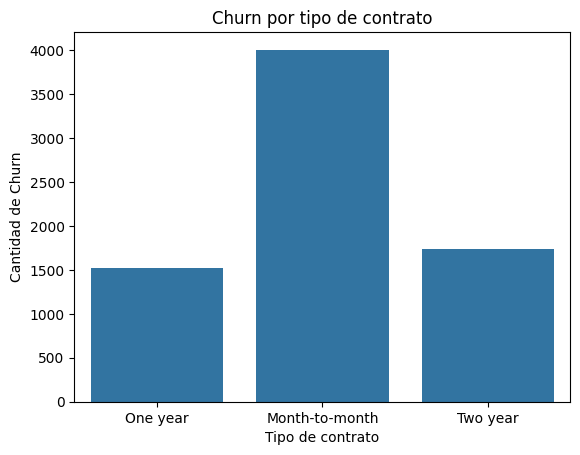

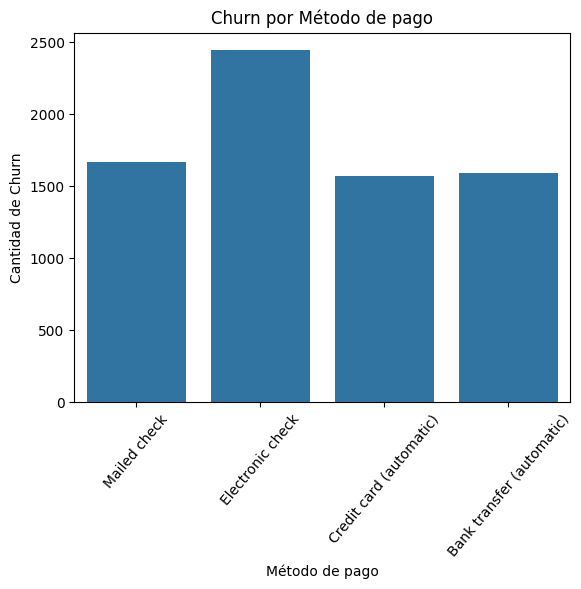

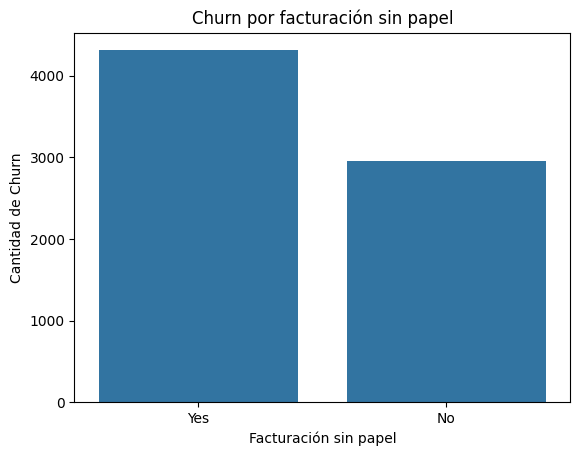

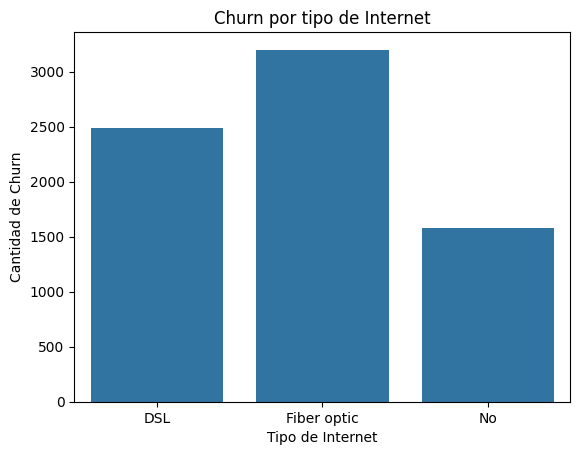

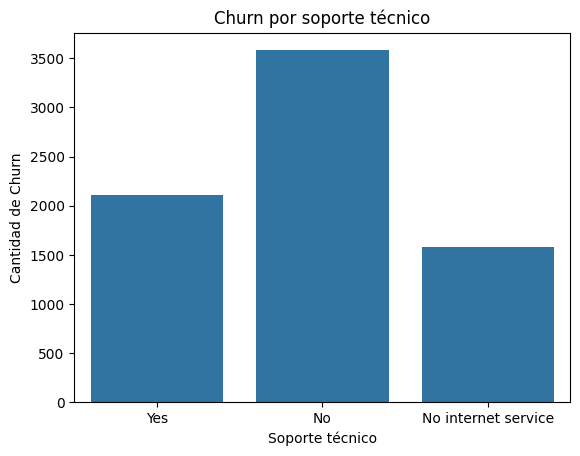

In [213]:
# Por tipo de contrato
sns.countplot(x='Contract', data=datos)
plt.title ('Churn por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de Churn')
plt.show()

#Por Método de pago
sns.countplot(x='PaymentMethod', data=datos)
plt.title ('Churn por Método de pago')
plt.xlabel('Método de pago')
plt.xticks(rotation=50)
plt.ylabel('Cantidad de Churn')
plt.show()

#Por facturación sin papel
sns.countplot(x='PaperlessBilling', data=datos)
plt.title ('Churn por facturación sin papel')
plt.xlabel('Facturación sin papel')
plt.ylabel('Cantidad de Churn')
plt.show()

#Por tipo de Internet
sns.countplot(x='InternetService', data=datos)
plt.title ('Churn por tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Cantidad de Churn')
plt.show()

#Por si tienen soporte técnico
sns.countplot(x='TechSupport', data=datos)
plt.title ('Churn por soporte técnico')
plt.xlabel('Soporte técnico')
plt.ylabel('Cantidad de Churn')
plt.show()

## **Encoding**

### Difniendo X & y

In [214]:
X = datos.drop(columns=['Churn'], axis=1)
y = datos['Churn']

In [215]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Daily_range',
       'Charges.Monthly_range', 'Charges.Total_range', 'tenure_range'],
      dtype='object')

In [216]:
y

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


## **Transformando las variables  explicativas**

In [217]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [218]:
columnas = X.columns

In [219]:
one_hot= make_column_transformer((OneHotEncoder(drop='if_binary'),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity','OnlineBackup',
                                  'DeviceProtection', 'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract', 'PaperlessBilling',
                                  'PaymentMethod', 'Charges.Daily_range','Charges.Monthly_range',
                                  'Charges.Total_range', 'tenure_range']),
                                 remainder='passthrough',
                                 sparse_threshold=0,
                                 force_int_remainder_cols=False)

In [220]:
x =one_hot.fit_transform(X)

In [221]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_Male', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet servic

In [222]:
x_encoded= pd.DataFrame(x, columns=one_hot.get_feature_names_out(columnas))

In [223]:
x_encoded

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__Charges.Total_range_1389.0-3411.5,onehotencoder__Charges.Total_range_3411.5-3779.0,onehotencoder__Charges.Total_range_3779.0-8685.0,onehotencoder__Charges.Total_range_396.0-1142.5,onehotencoder__tenure_range_0-12,onehotencoder__tenure_range_12-24,onehotencoder__tenure_range_24-36,onehotencoder__tenure_range_36-48,onehotencoder__tenure_range_48-60,onehotencoder__tenure_range_60+
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7263,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7264,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7265,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## **Transformando la variable respuesta**

In [224]:
from sklearn.preprocessing import LabelEncoder

In [225]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)

In [226]:
y_encoded= pd.Series(Y)
y_encoded

,0
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


## **Verificación de la Proporción de Cancelación (Churn)**

In [227]:
Churn_counts = datos['Churn'].value_counts()
Churn_counts

,count
Churn,
No,5174
Yes,2093




#🎯 Correlación y Selección de Variables

## **Análisis de Correlación**

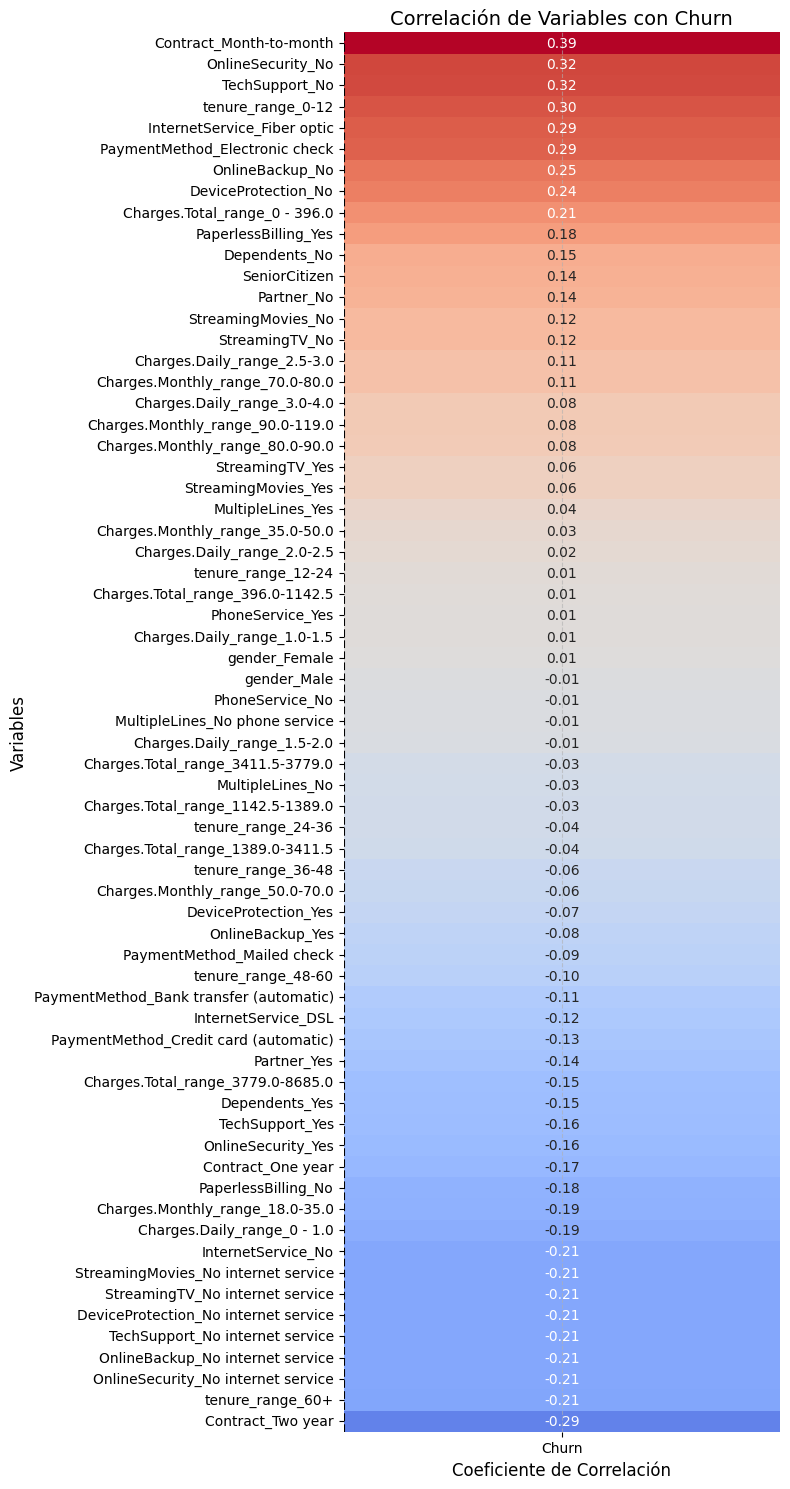

In [228]:
datos_numericos = datos.copy()
datos_numericos['Churn'] = datos_numericos['Churn'].map({'Yes': 1, 'No': 0})
datos_numericos = pd.get_dummies(datos_numericos, drop_first=False)

correlacion_churn = datos_numericos.corr(numeric_only=True)[['Churn']].sort_values(by='Churn', ascending=False)

correlacion_churn= correlacion_churn.drop('Churn')

plt.figure(figsize=(8, 15))
sns.heatmap(
    correlacion_churn,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=False
)

plt.title('Correlación de Variables con Churn', fontsize=14)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.axvline(0, color='black', linestyle='--')  # Línea en cero
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## **Análisis Dirigido**

### Tiempo de contrato X Churn

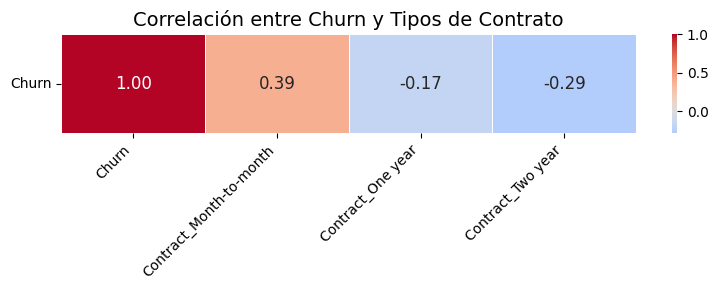

In [121]:
columnas_contrato = ['Churn', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']
df_correlacion = datos_numericos[columnas_contrato]

correlacion = df_correlacion.corr()

correlacion_churn = correlacion.loc[['Churn'], :]

plt.figure(figsize=(8, 3))
sns.heatmap(
    correlacion_churn,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 12}
)

plt.title('Correlación entre Churn y Tipos de Contrato', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [122]:
#Tipo de contrato con mayor correlación: Contrato mes a mes
datos_numericos[['Churn', 'Contract_Month-to-month']].corr()

,Churn,Contract_Month-to-month
Churn,1.000000,0.385824
Contract_Month-to-month,0.385824,1.000000


### Gastos total x Churn

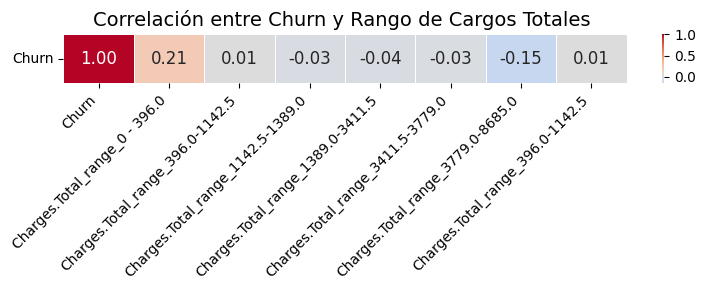

In [123]:
columnas_Charges_Total = ['Churn', 'Charges.Total_range_0 - 396.0', 'Charges.Total_range_396.0-1142.5', 'Charges.Total_range_1142.5-1389.0', 'Charges.Total_range_1389.0-3411.5', 'Charges.Total_range_3411.5-3779.0', 'Charges.Total_range_3779.0-8685.0','Charges.Total_range_396.0-1142.5' ]
df_correlacion = datos_numericos[columnas_Charges_Total]

correlacion = df_correlacion.corr()

correlacion_churn = correlacion.loc[['Churn'], :]

plt.figure(figsize=(8, 3))
sns.heatmap(
    correlacion_churn,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 12}
)

plt.title('Correlación entre Churn y Rango de Cargos Totales ', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [124]:
#Rango de Cargos totales con mayor correlación: Cargos totales de $0-$396
datos_numericos[['Churn','Charges.Total_range_0 - 396.0']].corr()

,Churn,Charges.Total_range_0 - 396.0
Churn,1.000000,0.207732
Charges.Total_range_0 - 396.0,0.207732,1.000000


### Tenture x Churn

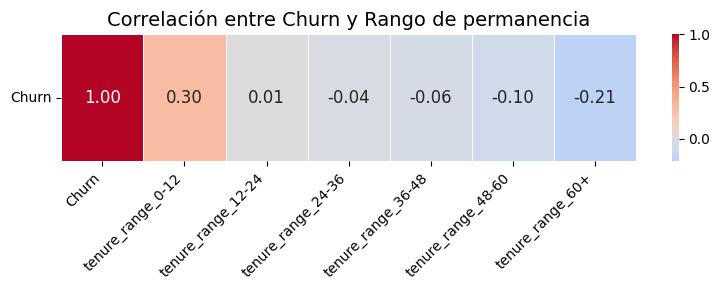

In [125]:
columnas_tenure = ['Churn', 'tenure_range_0-12', 'tenure_range_12-24', 'tenure_range_24-36',
                   'tenure_range_36-48', 'tenure_range_48-60','tenure_range_60+' ]

df_correlacion = datos_numericos[columnas_tenure]

correlacion = df_correlacion.corr()

correlacion_churn = correlacion.loc[['Churn'], :]

plt.figure(figsize=(8, 3))
sns.heatmap(
    correlacion_churn,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 12}
)

plt.title('Correlación entre Churn y Rango de permanencia', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [126]:
#Rango de meses de permanancia con mayor correlación: entre 0 a 12 meses
datos_numericos[['Churn','tenure_range_0-12']].corr()

,Churn,tenure_range_0-12
Churn,1.000000,0.304186
tenure_range_0-12,0.304186,1.000000


### Método de pago x Churn


/tmp/ipython-input-984181924.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


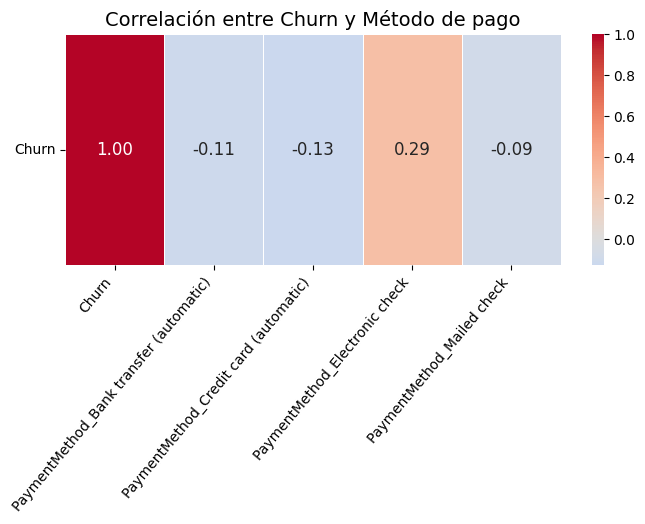

In [127]:
columnas_PaymentMethod = ['Churn', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check' ]

df_correlacion = datos_numericos[columnas_PaymentMethod]

correlacion = df_correlacion.corr()

correlacion_churn = correlacion.loc[['Churn'], :]

plt.figure(figsize=(8, 3))
sns.heatmap(
    correlacion_churn,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 12}
)

plt.title('Correlación entre Churn y Método de pago', fontsize=14)
plt.xticks(rotation=50, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [128]:
#Método de pago con mayor correlación: Cheque electrónico
datos_numericos[['Churn','PaymentMethod_Electronic check']].corr()

,Churn,PaymentMethod_Electronic check
Churn,1.000000,0.287357
PaymentMethod_Electronic check,0.287357,1.000000


### Tipo de Servicio de internet x Churn


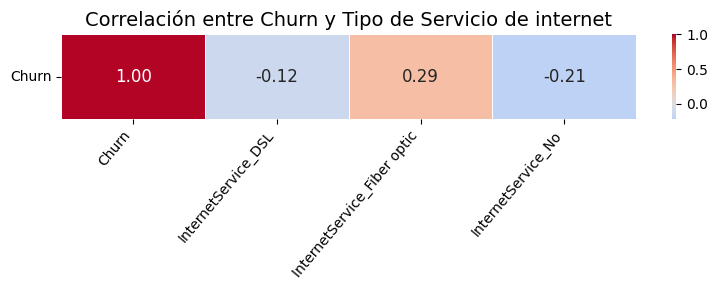

In [129]:
columnas_InternetService = ['Churn', 'InternetService_DSL','InternetService_Fiber optic','InternetService_No',]

df_correlacion = datos_numericos[columnas_InternetService]

correlacion = df_correlacion.corr()

correlacion_churn = correlacion.loc[['Churn'], :]

plt.figure(figsize=(8, 3))
sns.heatmap(
    correlacion_churn,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 12}
)

plt.title('Correlación entre Churn y Tipo de Servicio de internet', fontsize=14)
plt.xticks(rotation=50, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [130]:
#Tipo de Servicio de internet con mayor correlación: Fibra óptica
datos_numericos[['Churn','InternetService_Fiber optic']].corr()

,Churn,InternetService_Fiber optic
Churn,1.000000,0.292576
InternetService_Fiber optic,0.292576,1.000000


### Con soporte técnico x Churn

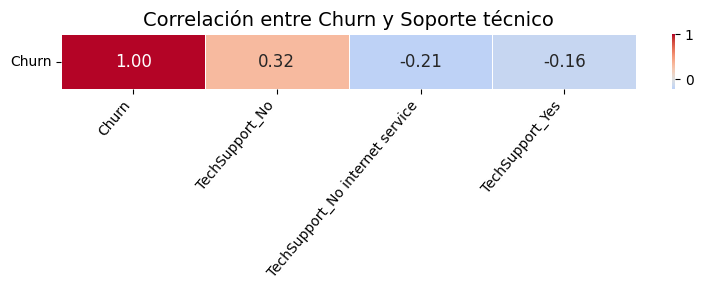

In [131]:
columnas_TechSupport = ['Churn', 'TechSupport_No','TechSupport_No internet service',
       'TechSupport_Yes' ]

df_correlacion = datos_numericos[columnas_TechSupport]

correlacion = df_correlacion.corr()

correlacion_churn = correlacion.loc[['Churn'], :]

plt.figure(figsize=(8, 3))
sns.heatmap(
    correlacion_churn,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 12}
)

plt.title('Correlación entre Churn y Soporte técnico', fontsize=14)
plt.xticks(rotation=50, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [132]:
#Tener o no Soporte ténico con mayor correlación: Sin soporte técnico
datos_numericos[['Churn','TechSupport_No']].corr()

,Churn,TechSupport_No
Churn,1.000000,0.318093
TechSupport_No,0.318093,1.000000


### PaperlessBilling x Churn

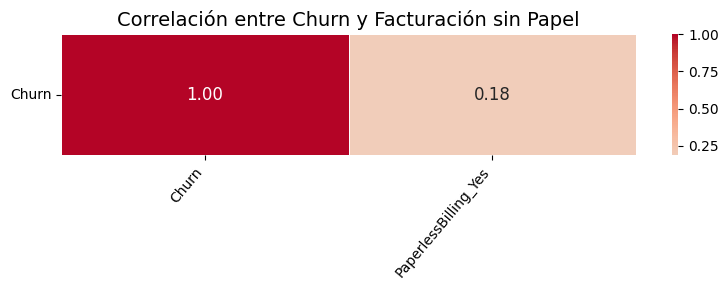

In [229]:
columnas_PaperlessBilling = ['Churn', 'PaperlessBilling_Yes' ]

df_correlacion = datos_numericos[columnas_PaperlessBilling]

correlacion = df_correlacion.corr()

correlacion_churn = correlacion.loc[['Churn'], :]

plt.figure(figsize=(8, 3))
sns.heatmap(
    correlacion_churn,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 12}
)

plt.title('Correlación entre Churn y Facturación sin Papel', fontsize=14)
plt.xticks(rotation=50, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [230]:
datos_numericos[['Churn','PaperlessBilling_Yes']].corr()

,Churn,PaperlessBilling_Yes
Churn,1.000000,0.184575
PaperlessBilling_Yes,0.184575,1.000000


#🤖 Modelado Predictivo

## Separación de Datos

In [231]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [232]:
X = x_encoded
y = y_encoded

In [233]:
dummyX_train, dummyX_test, dummyy_train, dummyy_test = train_test_split(X,y, test_size=0.3, random_state=42)

baseline = DummyRegressor()
baseline.fit(dummyX_train,dummyy_train)

DummyRegressor()

### Testeando el baseline

In [234]:
baseline.score(dummyX_test, dummyy_test)


-0.001831790912647735

In [235]:
baseline.score(dummyX_train,dummyy_train)

0.0

In [237]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(dummyy_test)

def calcular_clasificacion (dummyy_test, y_pred):
  rmse = mean_squared_error(dummyy_test,y_pred)
  mae= mean_absolute_error(dummyy_test,y_pred)
  r2 =r2_score(dummyy_test,y_pred)
  metricas= {
      'RMSE': round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }

  return metricas

In [238]:
resultados_baseline= calcular_clasificacion(dummyy_test, y_pred_dummy)
resultados_baseline

{'RMSE': 0.4467, 'MAE': 0.407, 'R2': -0.0018}



---



## Creación de Modelos

###1. RandomForest

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
modelo = RandomForestClassifier(max_depth=5, random_state=42)
modelo.fit(dummyX_train, dummyy_train)
ypred = modelo.predict(dummyX_test)
resultados_rf = calcular_clasificacion(dummyy_test, ypred)
resultados_rf

{'RMSE': 0.4632, 'MAE': 0.2146, 'R2': -0.0771}

#### Validación cruzada del modelo RandomForest

In [241]:
from sklearn.model_selection import KFold, cross_validate,StratifiedKFold

##### General Score:

In [242]:
modelo = RandomForestClassifier(max_depth=5)
kf= KFold(n_splits=10, shuffle=True, random_state=42)
cv_resultados = cross_validate(modelo, X, y, cv=kf)

In [244]:
cv_resultados['test_score']

array([0.80467675, 0.75240715, 0.78404402, 0.75790922, 0.75378267,
       0.76341128, 0.75515818, 0.79614325, 0.78512397, 0.7892562 ])

##### promedio, desviación estandar e intérvalo de confianza:

In [245]:
promedio= cv_resultados['test_score'].mean()
desvio_std= cv_resultados['test_score'].std()

print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es de: [{promedio-2*desvio_std}, {min(promedio + 2*desvio_std, 1)}]')


El promedio de la exactitud es de: 0.7741912686954578
El desvío típico es de: 0.018680035700647604
El intervalo de confianza es de: [0.7368311972941627, 0.811551340096753]


In [148]:
def intervalo_confianza(resultados):
  promedio= cv_results['test_score'].mean()
  desvio_std= cv_results['test_score'].std()
  return (f'El intervalo de confianza es de: [{promedio-2*desvio_std}, {min(promedio + 2*desvio_std, 1)}]')

In [246]:
modelo = RandomForestClassifier(max_depth=5)
kf= KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X, y, cv=kf, scoring='recall')

In [247]:
intervalo_confianza(cv_results)

'El intervalo de confianza es de: [0.33883325260918157, 0.48077618609383815]'

#### Balanceo de clases

In [248]:
datos['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.711986
Yes,0.288014


In [249]:
from imblearn.over_sampling import SMOTE

In [250]:
oversampling= SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X, y)

In [251]:
y_balanceada.value_counts(normalize= True)

,proportion
0,0.5
1,0.5


In [252]:
modelo = RandomForestClassifier(max_depth=5)
skf= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_balanceada, y_balanceada, cv=skf, scoring='recall')

In [253]:
intervalo_confianza(cv_results)

'El intervalo de confianza es de: [0.7542792702380667, 0.8255374627701555]'

ya mejoró el desbalance de clases

### Nuevo modelo RandomForest con datos balanceados

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_balanceada, y_balanceada, test_size=0.3, random_state=42)

modelo_RF= RandomForestClassifier(max_depth=5, random_state=42)
modelo_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [257]:
y_pred = modelo_RF.predict(y_test)

def calcular_clasificacion (y_test, y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 =r2_score(y_test,y_pred)
  metricas= {
      'RMSE': round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }

  return metricas

In [258]:
resultados_Modelo_RF= calcular_clasificacion(y_test, y_pred)
resultados_Modelo_RF

{'RMSE': 0.4941, 'MAE': 0.2441, 'R2': 0.0235}

In [259]:
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(modelo_RF, X_train, y_train, cv=skf, scoring=scoring)
cv_results

{'fit_time': array([0.33533454, 0.31999493, 0.34495163, 0.33009648, 0.33039594]),
 'score_time': array([0.01936126, 0.01882482, 0.019032  , 0.0187149 , 0.03360987]),
 'test_rmse': array([-0.47140452, -0.47432346, -0.48225946, -0.48242596, -0.46641338]),
 'test_mae': array([-0.22222222, -0.22498275, -0.23257419, -0.23273481, -0.21754144]),
 'test_r2': array([0.1111073 , 0.10006516, 0.06969926, 0.069059  , 0.12983259])}

#### Feature importance del modelo RandomForest




In [260]:
modelo_RF.feature_importances_

array([3.36008233e-03, 1.22408658e-02, 8.87177899e-03, 1.91870686e-02,
       4.48368471e-04, 1.72006164e-03, 3.12923203e-04, 2.69137081e-03,
       1.02335353e-02, 5.93855711e-02, 3.79424019e-03, 7.21467275e-02,
       5.29456230e-03, 2.53800367e-02, 3.20025348e-02, 8.00945218e-03,
       4.02300857e-03, 2.68880760e-02, 1.37789630e-02, 3.74118894e-03,
       8.55696023e-02, 8.38115291e-03, 1.14500224e-02, 1.53544614e-03,
       1.12184768e-02, 2.73737278e-03, 3.00956190e-03, 7.70022998e-03,
       2.44672123e-03, 1.50922813e-01, 1.35988752e-02, 5.59621887e-02,
       3.63932957e-02, 4.60995025e-03, 1.29671217e-02, 8.32767219e-02,
       2.36047717e-03, 5.48516792e-03, 2.87534613e-04, 1.66623041e-03,
       1.52290765e-04, 7.46709022e-04, 4.22732648e-03, 3.28861239e-03,
       8.99623620e-04, 5.13621794e-03, 4.90825285e-04, 1.49666059e-04,
       8.30696669e-03, 2.91824415e-02, 4.17435634e-04, 3.09806115e-03,
       7.04020351e-04, 1.58342846e-02, 4.27614694e-03, 7.15519497e-02,
      

In [261]:
importances = modelo_RF.feature_importances_

In [264]:
feature_importances= pd.DataFrame({'Features': X_balanceada.columns,'Importances': (importances*100).round(2)}).sort_values('Importances', ascending=False)
feature_importances.head(10)

,Features,Importances
29,onehotencoder__Contract_Month-to-month,15.09
20,onehotencoder__TechSupport_No,8.56
35,onehotencoder__PaymentMethod_Electronic check,8.33
11,onehotencoder__OnlineSecurity_No,7.21
55,onehotencoder__tenure_range_0-12,7.16
9,onehotencoder__InternetService_Fiber optic,5.94
31,onehotencoder__Contract_Two year,5.60
32,onehotencoder__PaperlessBilling_Yes,3.64
14,onehotencoder__OnlineBackup_No,3.20
49,onehotencoder__Charges.Total_range_0 - 396.0,2.92


In [265]:
resultados = pd.DataFrame(index=['RMSE', 'MAE','R2'])
model_features = RandomForestClassifier(max_depth=5, random_state=42)
ct_features = [i if i!=0 else 1 for i in range(0,40,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values [:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred =model_features.predict(X_test_sel)
  metricas = calcular_clasificacion(y_test, y_pred)
  resultados[i]= list(metricas.values())

resultados

,1,5,10,15,20,25,30,35
RMSE,0.5321,0.4875,0.4809,0.4882,0.4852,0.4855,0.4944,0.4915
MAE,0.2831,0.2377,0.2312,0.2383,0.2354,0.2357,0.2444,0.2415
R2,-0.1324,0.0493,0.0750,0.0467,0.0583,0.0570,0.0222,0.0338


In [266]:
resultados = pd.DataFrame(index=['RMSE', 'MAE','R2'])
model_features = RandomForestClassifier(max_depth=5, random_state=42)
ct_features = range(8,16)

for i in ct_features:
  selected_features = feature_importances['Features'].values [:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred =model_features.predict(X_test_sel)
  metricas = calcular_clasificacion(y_test, y_pred)
  resultados[i]= list(metricas.values())

resultados

,8,9,10,11,12,13,14,15
RMSE,0.4839,0.4755,0.4809,0.4785,0.4875,0.4768,0.4855,0.4882
MAE,0.2341,0.2261,0.2312,0.2290,0.2377,0.2274,0.2357,0.2383
R2,0.0634,0.0956,0.0750,0.0840,0.0493,0.0905,0.0570,0.0467


In [267]:
selected_features = feature_importances['Features'].values [:10]
X_selected_features =  X_balanceada[selected_features]
X_selected_features

,onehotencoder__Contract_Month-to-month,onehotencoder__TechSupport_No,onehotencoder__PaymentMethod_Electronic check,onehotencoder__OnlineSecurity_No,onehotencoder__tenure_range_0-12,onehotencoder__InternetService_Fiber optic,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__OnlineBackup_No,onehotencoder__Charges.Total_range_0 - 396.0
0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,1.000000,0.0,0.000000
1,1.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.000000,1.0,0.000000
2,1.0,1.0,1.000000,1.0,1.0,1.0,0.0,1.000000,1.0,1.000000
3,1.0,1.0,1.000000,1.0,0.0,1.0,0.0,1.000000,0.0,0.000000
4,1.0,0.0,0.000000,1.0,1.0,1.0,0.0,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...
10343,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,1.000000,1.0,0.660022
10344,1.0,1.0,0.853027,1.0,0.0,1.0,0.0,0.853027,1.0,0.000000
10345,1.0,1.0,1.000000,1.0,1.0,1.0,0.0,1.000000,1.0,1.000000
10346,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000


#### Evaluando el modelo RandomForest

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y_balanceada,random_state=42 )

In [269]:
param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [100, 150, 200]
 }

In [169]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=10, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid,
             scoring='r2', cv=cv)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [170]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [171]:
y_pred_model_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_clasificacion(y_test, y_pred_model_grid)
metricas_model_grid

{'RMSE': 0.456, 'MAE': 0.208, 'R2': 0.1678}

In [276]:
resultados['model_grid']= list(metricas_model_grid.values())
resultados

,8,9,10,11,12,13,14,15,model_grid
RMSE,0.4839,0.4755,0.4809,0.4785,0.4875,0.4768,0.4855,0.4882,0.4560
MAE,0.2341,0.2261,0.2312,0.2290,0.2377,0.2274,0.2357,0.2383,0.2080
R2,0.0634,0.0956,0.0750,0.0840,0.0493,0.0905,0.0570,0.0467,0.1678


##### **Calculando métricas**

In [173]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Métricas básicas
exactitud = accuracy_score(y_test, y_pred_model_grid)
precision = precision_score(y_test, y_pred_model_grid)
recall = recall_score(y_test, y_pred_model_grid)
f1 = f1_score(y_test, y_pred_model_grid)

print(f"Exactitud (Accuracy): {exactitud:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_model_grid))

Exactitud (Accuracy): 0.7920
Precisión: 0.8128
Recall (Sensibilidad): 0.7697
F1-score: 0.7907

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1267
           1       0.81      0.77      0.79      1320

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587



##### Matriz de Confusión

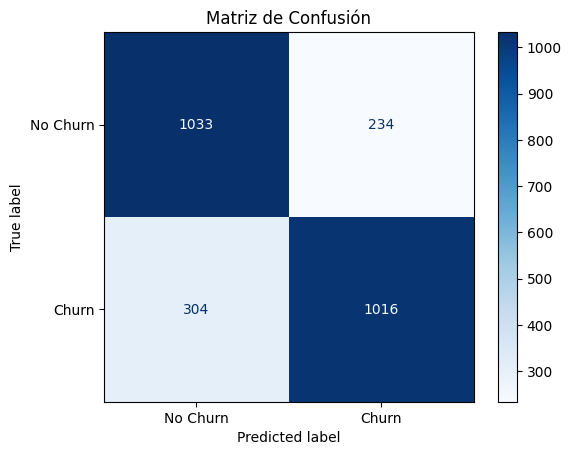

In [174]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_model_grid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

### 2. Modelo KNN

utilizamos **X_selected_features**  pues ya tiene las variables balanceadas y preseleccionadas según sun grado de correlación con Churn
Utilizamos **y_blalanceada** porque ya tiene los datos de churn balanceados



In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y_balanceada,random_state=42 )

#### Normalizando los datos para el modelo KNN

In [176]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [177]:
columnas = X_selected_features.columns
scaler = MinMaxScaler()
X_normalizado = pd.DataFrame(scaler.fit_transform(X_selected_features), columns=columnas)

In [178]:
X_normalizado.head()

,onehotencoder__Contract_Month-to-month,onehotencoder__PaymentMethod_Electronic check,onehotencoder__TechSupport_No,onehotencoder__OnlineSecurity_No,onehotencoder__tenure_range_0-12,onehotencoder__Contract_Two year,onehotencoder__InternetService_Fiber optic,onehotencoder__PaperlessBilling_Yes,onehotencoder__OnlineBackup_No,onehotencoder__DeviceProtection_No
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y_balanceada,random_state=42 )

### Creando el modelo KNN

In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

In [181]:

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)


KNeighborsClassifier()

#### Evaluando el modelo KNN

In [182]:
def calcular_clasificacion_knn (y_test, ypred):
  rmse = mean_squared_error(y_test,ypred)
  mae= mean_absolute_error(y_test,ypred)
  r2 =r2_score(y_test,ypred)
  metricas= {
      'RMSE': round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }

  return metricas

In [183]:
ypred = modelo_knn.predict(X_test)
resultados_knn = calcular_clasificacion_knn(y_test, ypred)
resultados_knn


{'RMSE': 0.5131, 'MAE': 0.2632, 'R2': -0.0534}

In [184]:
scores = cross_val_score(modelo_knn, X_normalizado, y_balanceada, cv=5, scoring='accuracy')

In [185]:
print("Puntajes por fold:", scores)
print("Precisión promedio:", scores.mean())
print("Desviación estándar:", scores.std())

Puntajes por fold: [0.52173913 0.59371981 0.68792271 0.71145481 0.68680522]
Precisión promedio: 0.6403283343023188
Desviación estándar: 0.07172176040308384


##### **Calculando métricas**


In [186]:
# Métricas básicas
exactitud = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred)
recall = recall_score(y_test, ypred)
f1 = f1_score(y_test, ypred)

print(f"Exactitud (Accuracy): {exactitud:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Reporte completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, ypred))

Exactitud (Accuracy): 0.7368
Precisión: 0.7678
Recall (Sensibilidad): 0.6939
F1-score: 0.7290

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1267
           1       0.77      0.69      0.73      1320

    accuracy                           0.74      2587
   macro avg       0.74      0.74      0.74      2587
weighted avg       0.74      0.74      0.74      2587



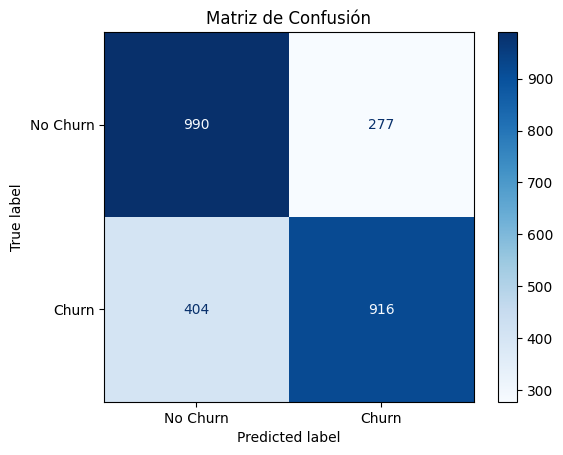

In [187]:
cm_knn = confusion_matrix(y_test, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()



---




In [272]:
df_selected_features = X_selected_features.copy()
df_selected_features['Churn'] = y_balanceada
df_selected_features

,onehotencoder__Contract_Month-to-month,onehotencoder__TechSupport_No,onehotencoder__PaymentMethod_Electronic check,onehotencoder__OnlineSecurity_No,onehotencoder__tenure_range_0-12,onehotencoder__InternetService_Fiber optic,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__OnlineBackup_No,onehotencoder__Charges.Total_range_0 - 396.0,Churn
0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,1.000000,0.0,0.000000,0
1,1.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.000000,1.0,0.000000,0
2,1.0,1.0,1.000000,1.0,1.0,1.0,0.0,1.000000,1.0,1.000000,1
3,1.0,1.0,1.000000,1.0,0.0,1.0,0.0,1.000000,0.0,0.000000,1
4,1.0,0.0,0.000000,1.0,1.0,1.0,0.0,1.000000,1.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
10343,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,1.000000,1.0,0.660022,1
10344,1.0,1.0,0.853027,1.0,0.0,1.0,0.0,0.853027,1.0,0.000000,1
10345,1.0,1.0,1.000000,1.0,1.0,1.0,0.0,1.000000,1.0,1.000000,1
10346,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,1




---



#📋 Interpretación y Conclusiones

## Interpretación


### **Análisis del Modelo Predictivo y Justificación de Random Forest**
El modelo seleccionado para la predicción de Churn fue **Random Forest**, el cual demostró un desempeño superior con una **precisión del 82%** en la identificación de clientes propensos a abandonar el servicio. Esta métrica refleja la capacidad del modelo para predecir correctamente los casos de Churn, lo que lo convierte en una herramienta estratégica para la retención de clientes.

####**Ventajas del Modelo Random Forest**
Random Forest fue elegido debido a las siguientes características clave:

1. **Robustez frente al sobreajuste:** Al combinar múltiples árboles de decisión, el modelo reduce la varianza y mejora la generalización.

2. **Manejo de relaciones no lineales e interacciones entre variables:** A diferencia de métodos lineales (como regresión logística), Random Forest captura patrones complejos en los datos, lo que es crucial en problemas de Churn donde múltiples factores interactúan.

3. **Importancia de variables intrínseca:** El modelo calcula la relevancia de cada feature basándose en su contribución a la reducción de la impureza (índice Gini) durante las divisiones de los árboles, lo que permite identificar predictores clave incluso cuando su correlación lineal con el target es baja.



---

#### **Hallazgos Clave del Análisis**
En la primera fase del proyecto, identificamos los principales factores asociados al Churn:

- Contratos de corta duración (Month-to-month).

- Métodos de pago manuales (Electronic Check).

- Falta de servicios de soporte (TechSupport_No, OnlineSecurity_No).

En esta segunda fase, validamos que las variables más relevantes para predecir el Churn están vinculadas a:

1. Compromiso del cliente (tipo de contrato, antigüedad).

2. Experiencia operativa (soporte técnico, métodos de pago).

3. Percepción de valor (servicios adicionales, facturación electrónica).

#### **Top 10 Variables Seleccionadas por el Modelo**
Las features con mayor peso predictivo, según la importancia calculada por Random Forest, fueron:

1. `Contract_Month-to-month`

2. `TechSupport_No`

3. `PaymentMethod_Electronic check`

4. `OnlineSecurity_No`

5. `Tenure_range_0-12`

6. `InternetService_Fiber optic`

7. `Contract_Two year`

8. `PaperlessBilling_Yes`

9. `Charges.Total_range_0 - 396.0`

10. `DeviceProtection_No`




---




#### **Correlación vs. Importancia en Random Forest**
El heatmap de correlación `mostró que Contract_Two year` tiene una **correlación negativa baja (-0.35)** con el Churn, lo que sugiere una relación lineal débil. Sin embargo, el modelo la posicionó como la **séptima variable más importante (5.6% de relevancia).** Esta aparente discrepancia se explica porque:

- **Random Forest aprovecha interacciones entre variables:** Por ejemplo, `Contract_Two year` puede ser determinante al combinarse con `Tenure` o `MonthlyCharges`, incluso si su impacto individual es bajo.

- **Captura no linealidades:** El modelo identifica contextos específicos donde esta feature sí influye (ej: clientes con contratos largos pero alto costo mensual).

- **Limitaciones del heatmap:** Este análisis solo evalúa relaciones lineales por pares, ignorando la complejidad que Random Forest sí considera.




/tmp/ipython-input-761532979.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


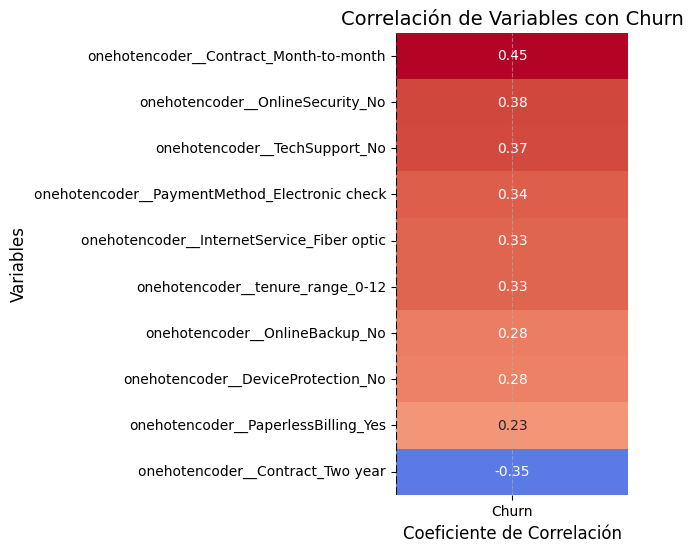

In [271]:
correlacion_sf_churn = df_selected_features.corr(numeric_only=True)[['Churn']].sort_values(by='Churn', ascending=False)

correlacion_sf_churn= correlacion_sf_churn.drop('Churn')

plt.figure(figsize=(3, 6))
sns.heatmap(
    correlacion_sf_churn,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=False
)

plt.title('Correlación de Variables con Churn', fontsize=14)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.axvline(0, color='black', linestyle='--')  # Línea en cero
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Conclusiones


La inclusión de `Contract_Two year` en el modelo está justificada por su contribución a patrones no lineales y su rol en interacciones con otras variables.

Random Forest demostró ser la mejor opción al equilibrar precisión, interpretabilidad y capacidad para manejar la complejidad de los datos. Los resultados refuerzan la necesidad de abordar el Churn desde múltiples dimensiones, priorizando no solo variables con alta correlación, sino también aquellas que, en conjunto, optimizan el poder predictivo del modelo.